In [ ]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
import datetime as dt

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, BatchNormalization, ReLU
from keras import Model

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
def TrainingSets(data, dataξ,step_back):
    train_data  = data.copy()
    train_dataξ = dataξ.copy()
    # training set
    X_train, ξ_train = [], []
    for i in range(len(train_data)-step_back - 1):
        a = train_data[i:(i+step_back)]
        X_train.append(a)
        ξ_train.append(train_dataξ[i + step_back])
    X_train = np.array(X_train); ξ_train = np.array(ξ_train);
    return  X_train, ξ_train

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-03-27 02:37:19--  https://docs.google.com/uc?export=download&confirm=&id=1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_
Resolving docs.google.com (docs.google.com)... 142.251.2.102, 142.251.2.101, 142.251.2.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ius714a7btskag3p3ph4fkjarftpscvg/1679884575000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=f5629348-23bd-4201-a1ed-053cd9318455 [following]
--2023-03-27 02:37:20--  https://doc-0c-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ius714a7btskag3p3ph4fkjarftpscvg/1679884575000/15940467605774616319/*/1feevcPPLWwZS2_ixxgKUoVi25NJQ0uJ_?e=download&uuid=f5629348-23bd-4201-a1ed-053cd9318455
Resolving doc-0c-6k-docs.googleusercontent.com (doc-0c-6k-docs.googleusercontent.com)... 142.251.2.132, 2607:f

In [ ]:
df=pd.read_excel('/content/Demanda_Arreglo_Mean.xlsx')

df.set_index('Date', inplace=True)


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
# df.info()

In [ ]:
# df.describe()

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

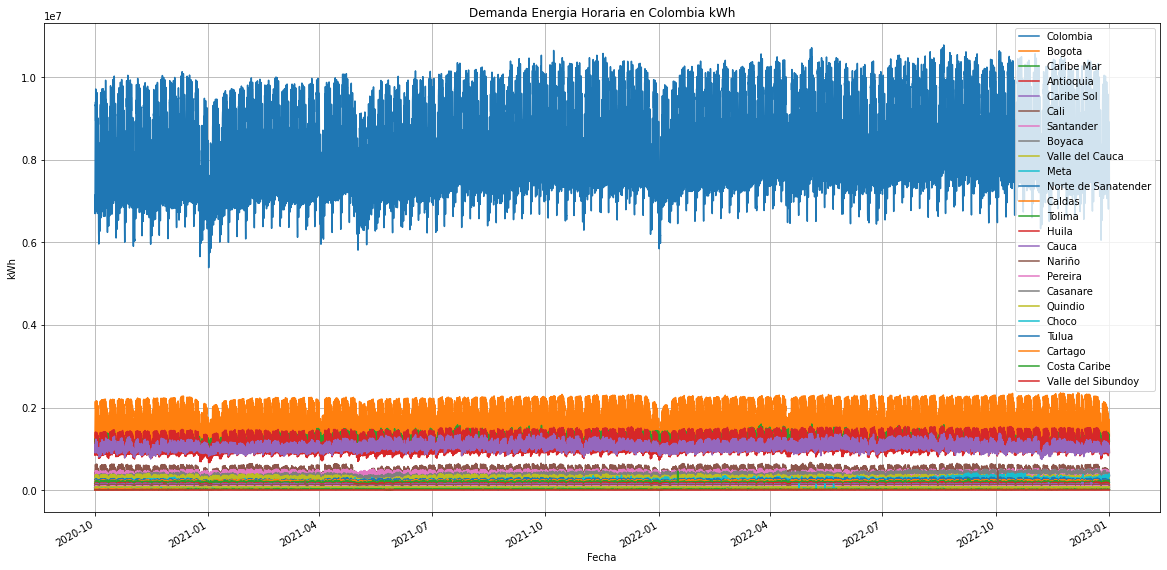

In [ ]:
df.plot(kind='line',figsize=(20,10),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha')

<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh'}, xlabel='Fecha', ylabel='kWh'>

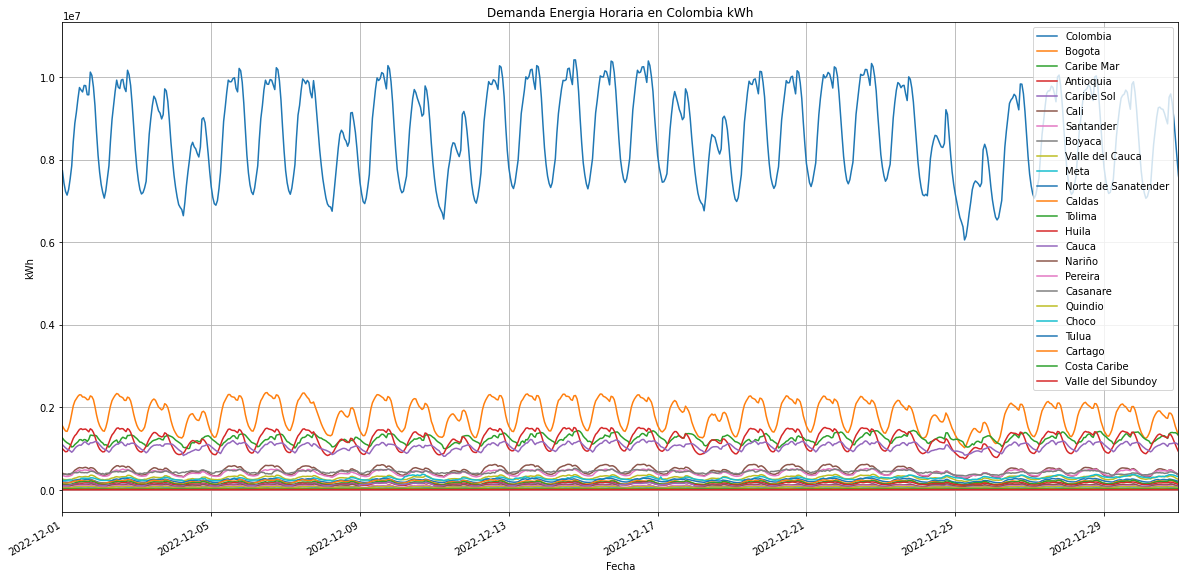

In [ ]:
df.plot(kind='line',figsize=(20,10),title='Demanda Energia Horaria en Colombia kWh', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'))

In [ ]:
df_max=max(df['Colombia'])
# print(df_max)
df1=df.values
df1=df1/df_max

In [ ]:
# df1=df.copy()
# #scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler.fit(df1)
# df1=scaler.transform(df1)

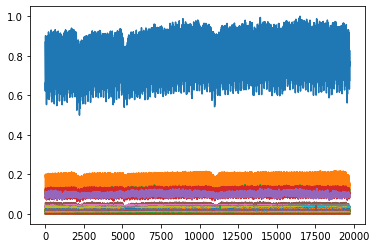

In [ ]:
plt.plot(df1)
plt.show()

In [ ]:
df1.shape

(19728, 24)

In [ ]:
Ts1=df1[:,1:]
out=df1[:,0]
print('Tamaño Serie Horaria: ', Ts1.shape)
print('Tamaño Serie Salida: ', out.shape)

Tamaño Serie Horaria:  (19728, 23)
Tamaño Serie Salida:  (19728,)


In [ ]:
#  Particion X,Y y Time_step/step_back/window
step_back = 24

X1, Y1 = TrainingSets(data = Ts1, dataξ = out,step_back=step_back)


#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
# X_test1=X_test1.reshape(len(X_test1),step_back)
# X_train1=X_train1.reshape(len(X_train1),step_back)

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1.reshape(len(Y_test1))
# Y_train1=Y_train1.reshape(len(Y_train1))



In [ ]:
print('Tamaño X_train1: ', X_train1.shape, 'Tamaño Y_train1: ', Y_train1.shape, )
print('Tamaño X_test1: ', X_test1.shape, 'Tamaño Y_test1: ', Y_test1.shape, )
print('-----------------------------------------------------------------------')


Tamaño X_train1:  (15762, 24, 23) Tamaño Y_train1:  (15762,)
Tamaño X_test1:  (3941, 24, 23) Tamaño Y_test1:  (3941,)
-----------------------------------------------------------------------


# Modelos DL


In [ ]:
N=100  # Numero de Epocas
bsz=512

## LSTM

In [ ]:
X_train1.shape[1:]

(24, 23)

In [ ]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
# initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)
# initializer = tf.keras.initializers.TruncatedNormal(mean=0., stddev=1.)
# initializer = tf.keras.initializers.Zeros()
# initializer = tf.keras.initializers.Ones()
# initializer = tf.keras.initializers.GlorotNormal()
# initializer = tf.keras.initializers.GlorotUniform()
# initializer = tf.keras.initializers.HeNormal()
# initializer = tf.keras.initializers.Identity()
# initializer = tf.keras.initializers.Orthogonal()
# initializer = tf.keras.initializers.Constant(3.)
# initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 23)]          0         
                                                                 
 lstm (LSTM)                 (None, 24, 100)           49600     
                                                                 
 re_lu (ReLU)                (None, 24, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 100)           80400     
                                                                 
 re_lu_1 (ReLU)              (None, 24, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 24, 100)           80400     
                                                                 
 re_lu_2 (ReLU)              (None, 24, 100)           0     

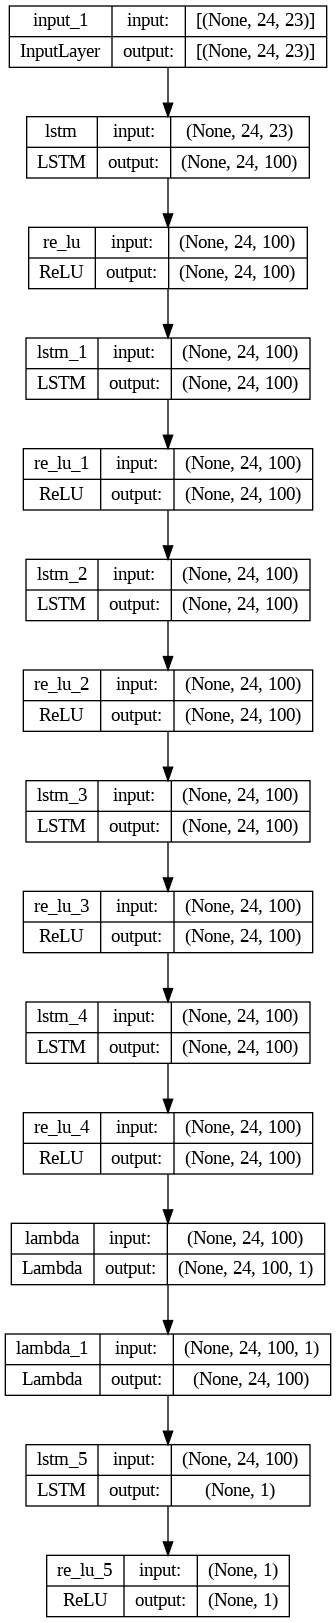

In [ ]:
from keras.layers import Input, LSTM, Dense
from keras.models import Model
# Importar la capa Lambda de Keras
from keras.layers import Lambda
from keras import backend as K
# Definir la entrada
inputs = Input(X_train1.shape[1:])

# Definir la función para agregar una dimensión adicional
add_dim = Lambda(lambda x: K.expand_dims(x, axis=3))

# Definir la función para quitar la dimensión adicional
remove_dim = Lambda(lambda x: K.squeeze(x, axis=3))

# Definir las capas LSTM
lstm1 = LSTM(units=100,kernel_initializer=initializer,return_sequences=True)(inputs)
lstm1 = ReLU()(lstm1)

lstm2 = LSTM(units=100,kernel_initializer=initializer, return_sequences=True)(lstm1)
lstm2 = ReLU()(lstm2)

lstm3 = LSTM(units=100,kernel_initializer=initializer, return_sequences=True)(lstm2)
lstm3 = ReLU()(lstm3)

# Aplicar la capa LSTM4
lstm4 = LSTM(units=100,kernel_initializer=initializer, return_sequences=True)(lstm3)
lstm4 = ReLU()(lstm4)

# Aplicar la capa LSTM5
lstm5 = LSTM(units=100,kernel_initializer=initializer, return_sequences=True)(lstm4)
lstm5 = ReLU()(lstm5)

# Agregar una dimensión adicional antes de la capa LSTM4
lstm4_input = add_dim(lstm5)

# Quitar la dimensión adicional después de la capa LSTM4
lstm4_output = remove_dim(lstm4_input)

# Definir la capa de salida
outputs = LSTM(units=1)(lstm4_output)
outputs = ReLU()(outputs)
# Crear el modelo
model_LSTM= Model(inputs=inputs, outputs=outputs)


# Compilar el modelo
model_LSTM.compile(loss='MSE', optimizer='adam', metrics=['mse','mae'])

model_LSTM.summary()

keras.utils.plot_model(model_LSTM, show_shapes=True)

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, verbose=1),]

In [ ]:
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz,callbacks=callbacks,validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 38s 1s/step - loss: 0.0159 - mse: 0.0159 - mae: 0.0924 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0541 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 24s 963ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0385 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0323 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 26s 1s/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0280 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0279 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 24s 962ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0257 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0311 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 23s 941ms/step - loss: 8.7269e-04 - mse: 8.7269e-04 - mae: 0.0228 - val_loss: 8.6153e-04 - val_mse: 8.6153e-04 - val_mae: 0.0240 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 26s 1s/step - loss: 6.8926e-04 - mse: 6.89

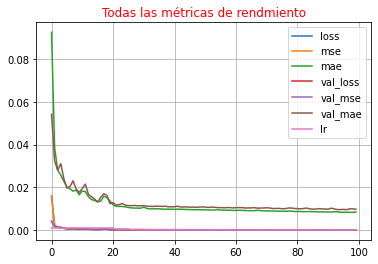

In [ ]:
hpd = pd.DataFrame(history.history)

hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

124/124 [==============================] - 7s 36ms/step


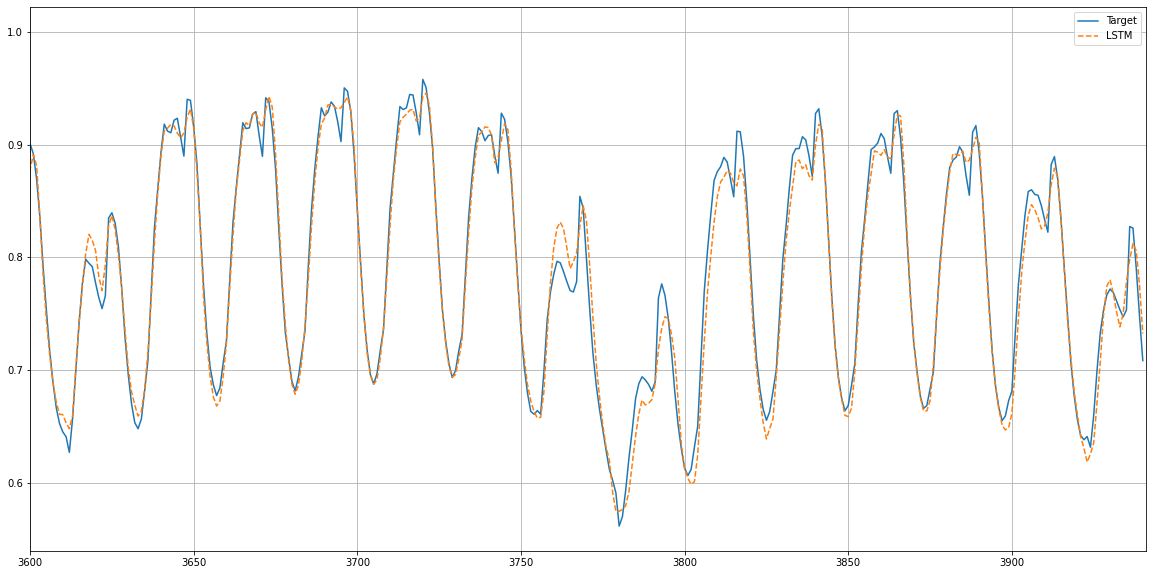

╒═══════════╤═════════════╕
│ Metrics   │        LSTM │
╞═══════════╪═════════════╡
│ MSE       │ 0.01469     │
├───────────┼─────────────┤
│ RMSE      │ 0.000215758 │
├───────────┼─────────────┤
│ MAE       │ 0.0113      │
├───────────┼─────────────┤
│ R2        │ 0.97864     │
╘═══════════╧═════════════╛


In [ ]:
forecasting_LSTM = model_LSTM.predict(X_test1)

forecasting_DL = [forecasting_LSTM]
model_names_DL = ['LSTM']

plt.figure(figsize=(20,10))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL)):
  plt.plot(forecasting_DL[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3600,len(forecasting_DL[i]))
plt.legend()
plt.grid()
plt.show()


col_names, MSE, RMSE, MAE, R2 = ['Metrics', 'LSTM'], ["MSE"], ["RMSE"], ["MAE"], ["R2"]
for k in range(len(col_names)-1):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL[k]),5))

tablas = [MSE, RMSE, MAE, R2]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))



In [ ]:
from requests import get
from socket import gethostname, gethostbyname
import requests
from google.colab import files

In [ ]:
colab_ip = %system hostname -I   # uses colab magic to get list from bash
colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
colab_port = 9000                # could use 6000, 8080, or 9000
filename = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
# Output will be of the form "xyz.ipynb"
print(filename)

02_MV_LSTM_Orden_Demanda_SN.ipynb


In [ ]:
# saving and loading the .h5 model

# save model
model_LSTM.save(filename[:-6]+'.h5')
print('Model Saved!')

# # load model
# savedModel=load_model('gfgModel.h5')
# savedModel.summary()

Model Saved!


In [ ]:
files.download(filename[:-6]+'.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>